In [142]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [143]:
import time
import torch
import numpy as np
import random

# torch.manual_seed(111)
# torch.cuda.manual_seed(111)
# np.random.seed(111)
# random.seed(111)
# torch.backends.cudnn.enabled=False
torch.backends.cudnn.deterministic=True

In [144]:
ncc = 6
n_epochs = 5
bn_size = 150

In [145]:

start_time = time.time()
%run autoenc_br.py --epochs {n_epochs} --connected_components {ncc} --dataset colmnist --regularizer svd --bn_size {bn_size} --n_workers 0
print("--- %s seconds ---" % (time.time() - start_time))
torch.save(trainer.model, "3dshapes_disent.pt")

In [146]:
# start_time = time.time()
# %run autoenc_baseline.py --epochs {n_epochs} --dataset threedshapes --bn_size {bn_size} --n_workers 0
# print("--- %s seconds ---" % (time.time() - start_time))
# torch.save(trainer.model, "3dshapes_not_disent.pt")

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1797: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Batch 1, training loss 0.3167, val loss 0.2991, block_reg 0.93, dropout rate 0.50
Batch 101, training loss 0.0703, val loss 0.0713, block_reg 0.92, dropout rate 0.50
Batch 201, training loss 0.0524, val loss 0.0578, block_reg 0.89, dropout rate 0.50
Batch 301, training loss 0.0520, val loss 0.0547, block_reg 0.88, dropout rate 0.50
Batch 401, training loss 0.0487, val loss 0.0497, block_reg 0.87, dropout rate 0.50
Batch 501, training loss 0.0503, val loss 0.0443, block_reg 0.85, dropout rate 0.50
Batch 601, training loss 0.0414, val loss 0.0475, block_reg 0.84, dropout rate 0.50
Batch 701, training loss 0.0461, val loss 0.0441, block_reg 0.84, dropout rate 0.50
Batch 801, training loss 0.0448, val loss 0.0400, block_reg 0.84, dropout rate 0.50
Batch 901, training loss 0.0459, val loss 0.0410, block_reg 0.84, dropout rate 0.50
Batch 1001, training loss 0.0378, val loss 0.0409, block_reg 0.83, dropout rate 0.50
Batch 1101, training loss 0.0411, val loss 0.0377, block_reg 0.83, dropout ra

<Figure size 432x288 with 0 Axes>

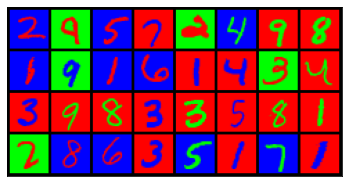

Image shape: torch.Size([3, 28, 28])


In [100]:
from plotting_utils import show_dataset_examples
show_dataset_examples(trainer)

In [115]:
# from plotting_utils import get_test_sample
# test_examples = get_test_sample(trainer)

In [116]:
(len(trainer.train_loader)/trainer.batch_size)

58.59375

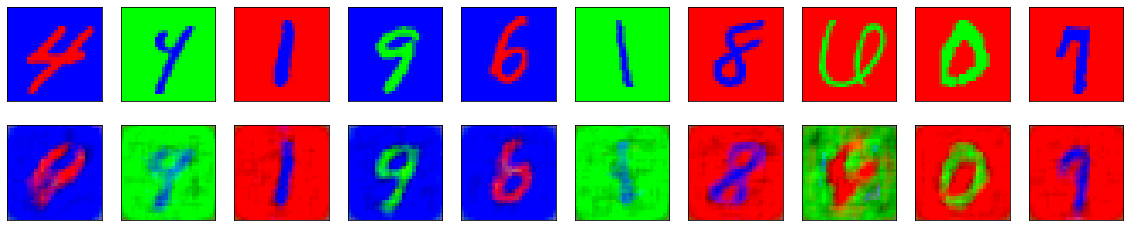

In [117]:
from plotting_utils import show_reconstruction
show_reconstruction(test_examples, trainer)

In [118]:
ncc = 2

In [119]:
from models import block_regularizer
block_regularizer(trainer.model.encoder_output_layer, ncc)

tensor(-3.9339e-05, device='cuda:0', grad_fn=<RsubBackward1>)

In [120]:
from models import layer_svd
import matplotlib.pyplot as plt

enc_layer = trainer.model.encoder_output_layer
u, s, v = layer_svd(enc_layer)
u = u.detach().cpu().numpy()
s = s.detach().cpu().numpy()
v = v.detach().cpu().numpy()
plt.figure(figsize=(20, 20))
plt.imshow(u[:, :ncc].transpose(1, 0), cmap="magma")

In [121]:
from models import compute_layer_blocks_out, compute_layer_blocks_in
blocks = compute_layer_blocks_out(enc_layer, ncc)
len(blocks)
print(blocks)

tensor([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
        1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 1], dtype=torch.int32)


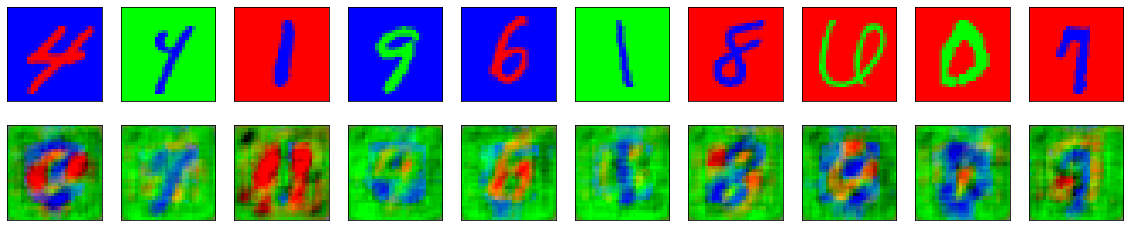

tensor([ True,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False, False,  True,  True,  True, False,  True, False,  True,  True,
        False,  True,  True,  True, False,  True, False,  True,  True, False,
        False, False,  True,  True,  True,  True,  True, False, False, False,
        False, False, False,  True,  True, False,  True,  True,  True,  True,
        False,  True,  True,  True,  True, False,  True,  True,  True,  True,
        False,  True, False,  True,  True, False, False,  True, False, False,
         True,  True,  True, False, False, False,  True,  True, False,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True,  True,
        False,  True,  True, False, False,  True,  True, False,  True,  True,
         True,  True,  True,  True, False,  True, False,  True, 

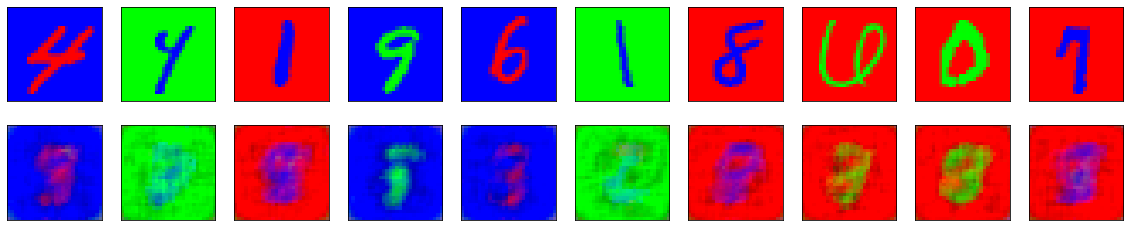

tensor([False, False, False, False, False,  True, False, False, False, False,
         True,  True, False, False, False,  True, False,  True, False, False,
         True, False, False, False,  True, False,  True, False, False,  True,
         True,  True, False, False, False, False, False,  True,  True,  True,
         True,  True,  True, False, False,  True, False, False, False, False,
         True, False, False, False, False,  True, False, False, False, False,
         True, False,  True, False, False,  True,  True, False,  True,  True,
        False, False, False,  True,  True,  True, False, False,  True, False,
        False, False, False, False, False, False, False, False, False, False,
        False,  True,  True, False, False,  True,  True, False, False, False,
        False, False, False, False, False, False, False, False, False, False,
         True, False, False,  True,  True, False, False,  True, False, False,
        False, False, False, False,  True, False,  True, False, 

In [122]:
from plotting_utils import plot_reconstruction

for c in range(max(blocks)+1):
    plt.figure(figsize=(20, 20)) 
    plt.imshow([blocks.numpy()==c], cmap='magma')
    enc_layer.turn_output_neurons_off(blocks==c)
    
    show_reconstruction(test_examples, trainer)
    
    print(enc_layer.out_mask)
    enc_layer.turn_all_output_neurons_on()

In [109]:
trainer.model

AE_baseline(
  (encoder_0): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (encoder_1): Sequential(
    (0): ReLU(inplace=True)
    (1): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
    (2): ReLU(inplace=True)
  )
  (encoder_hidden_layer): Linear(in_features=6400, out_features=1024, bias=True)
  (encoder_output_layer): DisentangledLinear(in_features=1024, out_features=150, bias=True)
  (decoder_hidden_layer): DisentangledLinear(in_features=150, out_features=1024, bias=True)
  (decoder_output_layer): Linear(in_features=1024, out_features=6400, bias=True)
  (decoder): Sequential(
    (0): ConvTranspose2d(16, 6, kernel_size=(5, 5), stride=(1, 1))
    (1): ReLU(inplace=True)
    (2): ConvTranspose2d(6, 3, kernel_size=(5, 5), stride=(1, 1))
    (3): ReLU(inplace=True)
  )
)

In [110]:

def plot_blocked_weights(layer):
    plt.figure(figsize=(20, 7))
    blocks_in = compute_layer_blocks_in(layer, ncc)
    blocks_out = compute_layer_blocks_out(layer, ncc)
    plt.imshow(layer.weight[np.argsort(blocks_out)][:, np.argsort(blocks_in)].cpu().detach().numpy(), cmap='magma')
    plt.show()


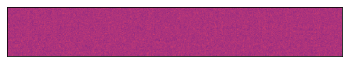

In [111]:
new_weight = np.zeros(enc_layer.weight.shape)
blocks_out = compute_layer_blocks_out(enc_layer, ncc)
blocks_in = compute_layer_blocks_in(enc_layer, ncc)
for i in range(ncc):
    mask = np.ones(enc_layer.weight.shape, dtype=bool)
    mask[blocks_out!=i] = 0
    mask[:, blocks_in!=i] = 0
    new_weight[mask] = enc_layer.weight.detach().cpu()[mask]
    
plt.imshow(new_weight, cmap='magma')

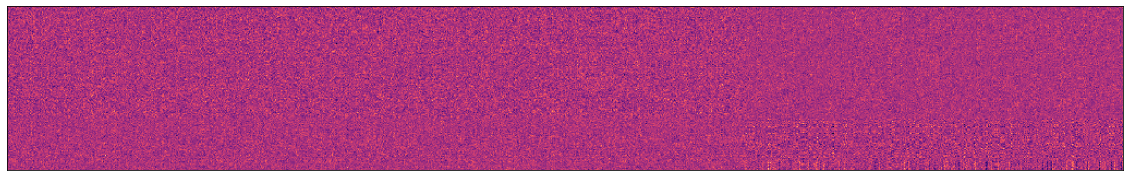

In [112]:
plot_blocked_weights(enc_layer)

In [113]:
enc_layer.weight = nn.Parameter(torch.tensor(new_weight).cuda().float())

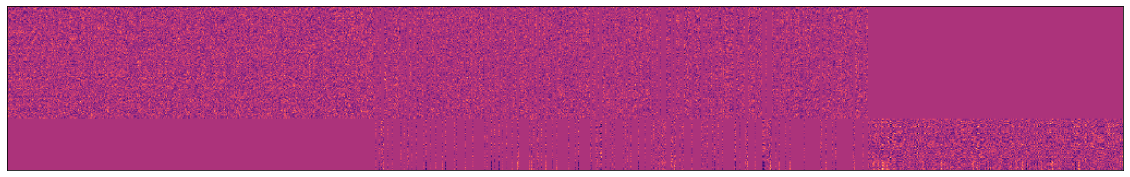

In [114]:
plot_blocked_weights(enc_layer)

In [ ]:
np.where(blocks==0)

In [ ]:
for c in range(ncc):
    print("block {}".format(c))
    for n in np.where(blocks==c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[n] = 1
        print(n)
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        print(trainer.criterion(test_examples, reconstruction))
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error = [None]*bn_size
for c in range(ncc):
    mask = torch.zeros(60, dtype=torch.float)
    mask[blocks==c] = 1
    enc_layer.turn_output_neurons_off(mask)
    with torch.no_grad():
        reconstruction = trainer.model(test_examples)
    block_error = trainer.criterion(test_examples, reconstruction).item()
    enc_layer.turn_all_output_neurons_on()
        
    #print("block {}".format(c))
    for n in np.where(blocks!=c)[0]:
        mask = torch.zeros(60, dtype=torch.float)
        mask[blocks==c] = 1
        mask[n] = 1
        #print(n)
        #plt.figure(figsize=(20, 20)) 
        #plt.imshow(mask.unsqueeze(0), cmap='magma')
        enc_layer.turn_output_neurons_off(mask)

        with torch.no_grad():
            reconstruction = trainer.model(test_examples)
        #plot_reconstruction(test_examples.detach(), reconstruction.detach().cpu())
        relative_error[n] = block_error - trainer.criterion(test_examples, reconstruction).item()
        enc_layer.turn_all_output_neurons_on()

In [ ]:
relative_error

In [ ]:

plt.figure()
plt.hist(np.array(relative_error)[blocks==0])
plt.figure()
plt.hist(np.array(relative_error)[blocks==1])
thr = np.percentile(np.array(relative_error), 20)
re_mask = np.array([e>thr for e in relative_error])
re_mask.sum()

In [ ]:
for c in range(ncc):
    mask = np.logical_and(np.array(blocks==c), re_mask)
    plt.figure(figsize=(20, 20)) 
    plt.imshow(torch.tensor(mask).unsqueeze(0), cmap='magma')
    enc_layer.turn_output_neurons_off(mask)
    
    show_reconstruction(test_examples, trainer)
    enc_layer.turn_all_output_neurons_on()

In [ ]:
srt_enc = np.argsort(v.transpose(1, 0)[:, 1]).tolist()
srt_hidden = np.argsort(u.transpose(1, 0)[:, 1]).tolist()

trainer.model.set_mask(None)

w1 = trainer.model.encoder_output_layer.weight.cpu().detach()
w1 = w1[:, srt_enc]
w1 = w1[srt_hidden, :]


In [ ]:
srt_enc

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow((w1).cpu().numpy(), cmap='magma')

In [ ]:
binned_examples = [[[] for _ in range(3)] for _ in range(10)]
for batch_features in trainer.test_loader:
    batch_features, (digit, _, clr) = batch_features
    for i in range(len(batch_features)):
        binned_examples[digit[i].item()][clr[i].item()].append(batch_features[i].to(device))

In [ ]:
for d in range(10):
    for clr in range(3):
        binned_examples[d][clr] = torch.stack(binned_examples[d][clr]).to(device)
        print(binned_examples[d][clr].shape)

In [ ]:
losses = []
for _ in range(ncc):
    losses.append(torch.zeros((3, 10)))
    
for c in range(ncc):
    mask = torch.zeros(w.shape)
    mask.shape
    mask[blocks==c] = 1
    plt.figure(figsize=(20, 20)) 
    plt.imshow(mask[:, :1].transpose(1, 0), cmap='magma')
    trainer.model.set_mask(mask)
    
    for clr in range(3):
        for d in range(10):
            with torch.no_grad():
                reconstruction = trainer.model(binned_examples[d][clr]).cpu()
            show_reconstruction(binned_examples[d][clr], reconstruction)
            losses[c][clr][d] = trainer.criterion(binned_examples[d][clr], reconstruction.cuda())

In [ ]:

for c in range(ncc):
    plt.grid(False)
    plt.imshow(losses[c], cmap="magma")
    plt.show()
    print(losses[c])

           

In [ ]:
print(losses[0].sum(0))
print(losses[0].sum(1))
print(losses[1].sum(0))
print(losses[1].sum(1))

In [ ]:
def block_dropout(blocks, prob):
    mask = torch.zeros(len(blocks), dtype=torch.bool)
    first_mask = torch.rand(((blocks==0).sum(), )) < prob
    mask[blocks==0] = first_mask
    p = first_mask.sum()/len(first_mask)
    for i in range(1, max(blocks)+1):
        new_mask = torch.zeros(((blocks==i).sum(), ), dtype=torch.bool)
        new_mask[:int(p*len(new_mask))] = 1
        mask[blocks==i] = new_mask[torch.randperm(len(new_mask))]

    return mask.float()

block_dropout(blocks, 0.2)

In [ ]:
b_test = np.array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])
for i in range(20):
    d = block_dropout(b_test, 0.3)
    print(d[:8].sum().item(), d[8:].sum().item())
    print(d)

# T-SNE

In [127]:
!pip install pandas seaborn

     |████████████████████████████████| 292 kB 9.6 MB/s eta 0:00:01


In [128]:
import time
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

In [129]:
# Utility function to visualize the outputs of PCA and t-SNE
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
RS = 123

def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [131]:
embeddings = []
targets = []
d_targets = []
c_targets = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features.cuda()).cpu()
        embeddings.append(trainer.model.embedding)
        d_targets.extend(digit.tolist())
        c_targets.extend(clr.tolist())
        #targets.extend([str(d)+"_"+str(c) for d, c in zip(digit.tolist(), clr.tolist())])

/opt/conda/lib/python3.8/site-packages/torch/nn/functional.py:1797: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [132]:
df_emb = torch.vstack(embeddings).detach().cpu().numpy()
targets = [c*10+d for d, c in zip(d_targets, c_targets)]

In [133]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df_emb)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.196s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.685826
[t-SNE] KL divergence after 250 iterations with early exaggeration: 78.015839
[t-SNE] KL divergence after 300 iterations: 2.605501
t-SNE done! Time elapsed:

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(1.2684994, -3.5619538, '0'),
  Text(-8.89765, -2.9963956, '1'),
  Text(-5.501674, -3.4064019, '2'),
  Text(-1.8574063, -4.644599, '3'),
  Text(-2.3451936, -9.123361, '4'),
  Text(-1.5663503, -4.130541, '5'),
  Text(0.11349681, -1.7935197, '6'),
  Text(-5.3438225, -7.9298615, '7'),
  Text(-2.2916439, -5.007212, '8'),
  Text(-3.301098, -9.222558, '9'),
  Text(-4.380741, 8.014441, '10'),
  Text(-7.3841963, 0.23031028, '11'),
  Text(-4.2856283, 5.079029, '12'),
  Text(-4.3087554, 4.620286, '13'),
  Text(-2.0532167, 2.9987357, '14'),
  Text(-4.55097, 5.1438456, '15'),
  Text(-0.78835905, 6.118251, '16'),
  Text(-0.18467844, 6.2850356, '17'),
  Text(-1.0489049, 5.8241615, '18'),
  Text(-1.8093519, 2.9690652, '19'),
  Text(10.375475, 2.2037945, '20'),
  Text(4.026552, -5.7212753, '21'),
  Text(7.2886806, -3.983196, '22'),
  Text(8.347458, -1.3390584, '23'),
  Text(2.7305663, 2.2904663, '24'),
  Text(6.5350075, 0.09479267, '25'),
  Te

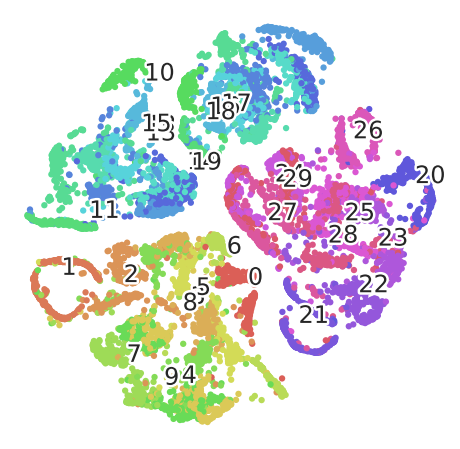

In [134]:
fashion_scatter(tsne_results, np.array(targets))


/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-2.5672386, -5.1451025, '0'),
  Text(-2.2446468, 5.1931124, '1'),
  Text(5.599648, 0.37807927, '2')])

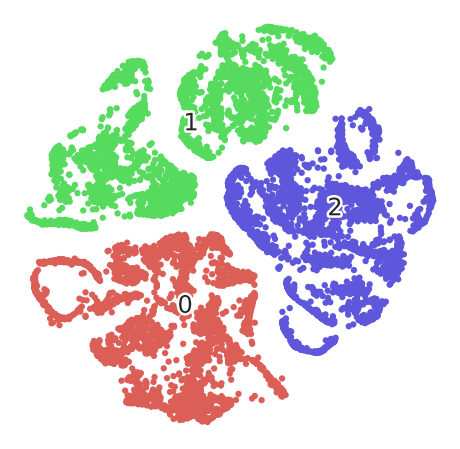

In [135]:
fashion_scatter(tsne_results, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(1.2528627, 2.1926603, '0'),
  Text(-6.9916077, -2.9907691, '1'),
  Text(-2.882576, -2.482182, '2'),
  Text(-0.44406205, 0.033512812, '3'),
  Text(0.078047276, 1.6697018, '4'),
  Text(0.50751674, 0.063616425, '5'),
  Text(0.088428475, 4.614727, '6'),
  Text(0.6580451, 0.22068465, '7'),
  Text(-0.03332457, -0.51557505, '8'),
  Text(-0.7440418, 1.3208922, '9')])

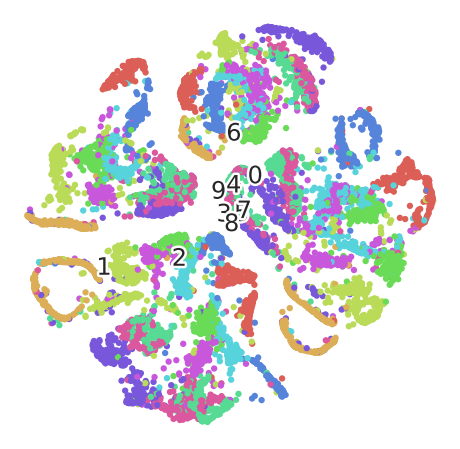

In [136]:
fashion_scatter(tsne_results, np.array(d_targets))

In [137]:
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results_block0 = tsne.fit_transform(df_emb[:, blocks==0])
tsne_results_block1 = tsne.fit_transform(df_emb[:, blocks==1])
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.266s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.410879
[t-SNE] KL divergence after 250 iterations with early exaggeration: 89.974686
[t-SNE] KL divergence after 300 iterations: 2.879645
[t-SNE] Computing 121 nea

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-1.8571264, -0.19198436, '0'),
  Text(-0.120392874, 0.070274584, '1'),
  Text(1.8760347, 0.1772251, '2')])

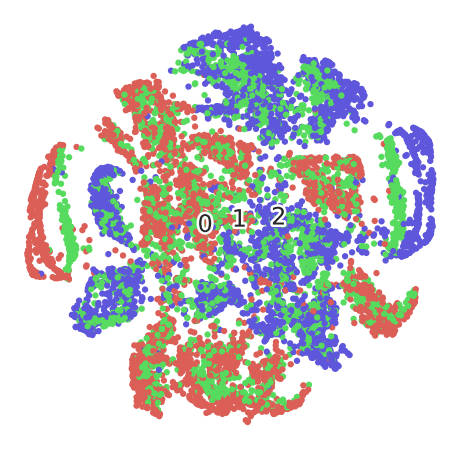

In [138]:
fashion_scatter(tsne_results_block0, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(2.867302, 0.68346065, '0'),
  Text(7.7692366, 0.87458426, '1'),
  Text(-0.8060272, 1.5307615, '2'),
  Text(-0.0281878, 0.68264365, '3'),
  Text(0.7052989, 4.6504602, '4'),
  Text(0.06271851, -0.27882835, '5'),
  Text(2.7205868, -2.3181787, '6'),
  Text(1.4763844, -0.22526127, '7'),
  Text(-1.0206351, -0.10711604, '8'),
  Text(-0.17950515, 1.0038723, '9')])

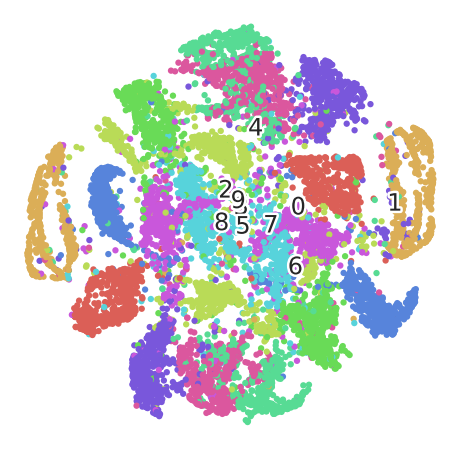

In [139]:
fashion_scatter(tsne_results_block0, np.array(d_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(-3.0704412, -3.0496953, '0'),
  Text(5.2107034, -2.5735536, '1'),
  Text(-2.2186017, 6.410373, '2')])

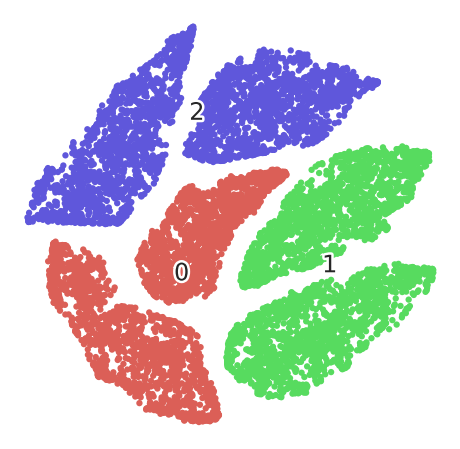

In [140]:
fashion_scatter(tsne_results_block1, np.array(c_targets))

/tmp/ipykernel_6912/353655322.py:24: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(0.7486911, -1.0690129, '0'),
  Text(-1.9778023, 0.38828903, '1'),
  Text(0.9090011, -0.40278405, '2'),
  Text(0.76813364, 0.23630449, '3'),
  Text(-0.82419264, 0.38053638, '4'),
  Text(-0.96768486, 0.585564, '5'),
  Text(1.1760929, 0.39909387, '6'),
  Text(-0.5896728, 0.30684364, '7'),
  Text(1.1364794, 0.49257848, '8'),
  Text(-0.40015808, -0.06783087, '9')])

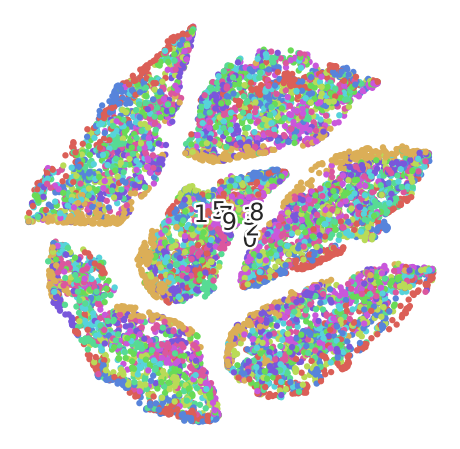

In [141]:
fashion_scatter(tsne_results_block1, np.array(d_targets))

# Dependencies between blocks

In [ ]:
plt.rcParams["axes.grid"] = False
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==0].transpose(1, 0)))
plt.colorbar()

In [ ]:
plt.figure(figsize=(20, 20)) 
plt.imshow(np.cov(df_emb[:, blocks==1].transpose(1, 0)))
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
full_corr = np.corrcoef(df_emb[:, blocks==0].transpose(1, 0), df_emb[:, blocks==1].transpose(1, 0))
plt.figure(figsize=(20, 20)) 
plt.imshow(full_corr)
plt.colorbar()

In [ ]:
dist = np.zeros((bn_size, bn_size))
for i in range(bn_size):
    for j in range(i, bn_size):
        dist[i, j] = np.abs(full_corr[i]-full_corr[j]).sum()
        dist[j, i] = np.abs(full_corr[i]-full_corr[j]).sum()
        
plt.figure(figsize=(20, 20)) 
plt.imshow(dist<5)
plt.colorbar()

plt.figure(figsize=(20, 20)) 
plt.hist(dist.flatten())

# Collect activations

In [ ]:
from explainn_code.grab_functions import db_from_dat_with_labels, write_pic_as_sets

activations = []
test_data = []
for batch_features, (digit, _, clr) in trainer.test_loader:
    with torch.no_grad():
        reconstruction = trainer.model(batch_features).cpu()
        activations.append(trainer.model.layer_0_out.detach().cpu().numpy())
        test_data.append(batch_features.detach().cpu().numpy())
activations = np.concatenate(activations)


In [ ]:
for i in range(6):
    write_pic_as_sets(activations[:, i, :].reshape(activations.shape[0], -1), "filters_{}.dat".format(i))

In [ ]:
test_data = np.concatenate(test_data)
write_pic_as_sets(test_data.reshape(test_data.shape[0], -1), "test_data.dat")

In [ ]:
for i in range(6):
    db_from_dat_with_labels("filters_{}.dat".format(i), "test_data.dat", "data{}.db".format(i))